1. Как применить законы статистики к данным ? Сколько элементов сумм использовано в коде?

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import seaborn as sns

15


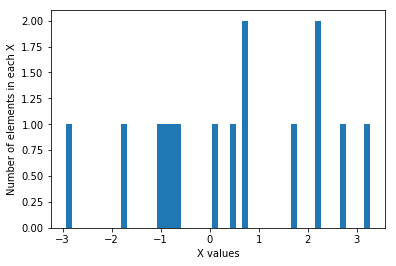

In [85]:
#чем больше установить number_of_sums, тем ближе построенное распределение будет к нормальному (согласно Центральной предельной теореме)
#чтобы узнать number_of_sums надо просуммировать Number of elements in each X для каждого X, по графику получается number_of_sums=15. Можно поставить счетчик s в цикл.
number_of_sums = 15
number_of_randoms = 10
s=0
X1 = np.zeros((number_of_sums, 1)) #Функция zeros() создает массив из нулей
for i in range(number_of_sums):
    X1[i,0] = np.sum(np.random.rand(number_of_randoms,1)) - np.sum(np.random.rand(number_of_randoms,1))
    s+=1
print(s)
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

2. Чему равна матрица ковариаций для графика?

In [86]:
#по графику видно, что дисперсия по X и Y выросла с 1 до 1,5, также появилась отрицательная кореляция под углом примерно -45 градусов. Эмпирически можно предположить, что C = [[1.5,-0.5],[-0.5,1.5]] 

3. Построить преобразование с помощью вычисленной выше матрицей

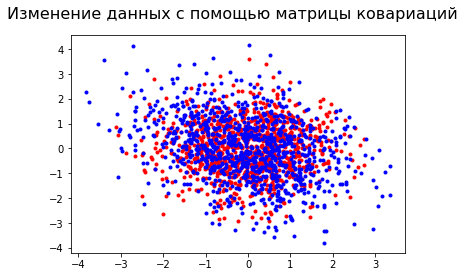

In [87]:
import numpy.linalg as la
n = 1000
C = [[1.5,-0.5],[-0.5,1.5]]
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16)  
plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')

4. Посчитать угол наклона полученного распределения (визуально) в радианах и посчитать разброс данных теоритически и практически

In [88]:
#Визуально угол составляет около 135 градусов: 135° × π/180 = 2.355 рад

In [89]:
import math
i = 135
theta = i
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp = np.transpose(Y)*u                            
var_empirical = np.var(yp)
var_theoretical = np.transpose(u)*C*u
print('генерация данных: ', var_empirical)
print('теоритический подсчет: ', var_theoretical)

генерация данных:  1.6945846766719017
теоритический подсчет:  [[1.58802297]]


5. При большом количестве данных эти показатели должны быть равны. Достаточно ли мы данных сгенерировали?

In [90]:
print(var_theoretical-var_empirical)

[[-0.1065617]]


In [6]:
#При n=1000 var_theoretical отличается от var_empirical на 10 десятых, при увеличении n до 100000 разница уменьшается до десятитысячных долей. Таким образом, количество генерируемых данных может определяться уровнем необходимой точности, для 5% достаточно n=10000. 

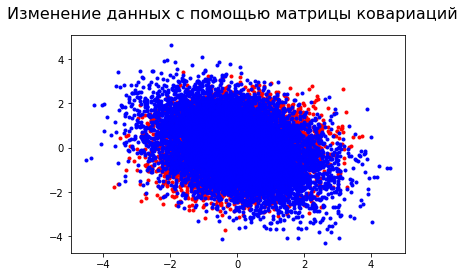

In [91]:
import numpy.linalg as la
n1 = 10000
C = [[1.5,-0.5],[-0.5,1.5]]
A = la.cholesky(C)
X1 = np.random.randn(n1,2)
Y1 = np.dot(A,X1.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16)  
plt.plot(X1[:,0], X1[:,1], 'r.')
plt.plot(Y1[0,:], Y1[1,:], 'b.')

In [92]:
import math
i = 135
theta = i
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp1 = np.transpose(Y1)*u                            
var_empirical1 = np.var(yp1)
var_theoretical1 = np.transpose(u)*C*u
print('генерация данных: ', var_empirical1)
print('теоритический подсчет: ', var_theoretical1)
print(var_theoretical1-var_empirical1)

генерация данных:  1.5497177351024531
теоритический подсчет:  [[1.58802297]]
[[0.03830524]]


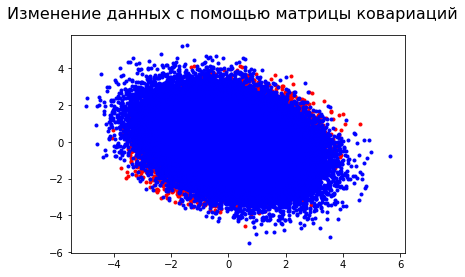

In [93]:
import numpy.linalg as la
n2 = 100000
C = [[1.5,-0.5],[-0.5,1.5]]
A = la.cholesky(C)
X2 = np.random.randn(n2,2)
Y2 = np.dot(A,X2.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16)  
plt.plot(X2[:,0], X2[:,1], 'r.')
plt.plot(Y2[0,:], Y2[1,:], 'b.')

In [94]:
import math
i = 135
theta = i
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp2 = np.transpose(Y2)*u                            
var_empirical2 = np.var(yp2)
var_theoretical2 = np.transpose(u)*C*u
print('генерация данных: ', var_empirical2)
print('теоритический подсчет: ', var_theoretical2)
print(var_theoretical2-var_empirical2)

генерация данных:  1.580178057150965
теоритический подсчет:  [[1.58802297]]
[[0.00784492]]


6. Посчитать как меняется вариация в зависимости от выбора собственного вектора.

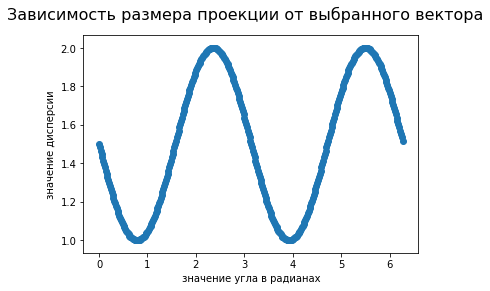

In [95]:
degrees360 = [2*math.pi/360*i for i in range(360)]
variances = []
for i in degrees360:
    theta = i
    u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
    yp = np.transpose(Y)*u
    var_empirical = np.var(yp)
    var_theoretical = np.transpose(u)*C*u
    variances.append(var_theoretical)

plt.suptitle('Зависимость размера проекции от выбранного вектора', fontsize=16)    
plt.xlabel('значение угла в радианах')
plt.ylabel('значение дисперсии')
plt.scatter(degrees360, variances)
plt.show()

7. Загрузить таблицу.

In [96]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)

In [97]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


8. Построить корелляцию для всех типов авокадо (их там три). Построить графики histograms и плотность распределения (смотрим примеры из лекций).

In [98]:
corr_matrix = df.corr()
corr_matrix

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


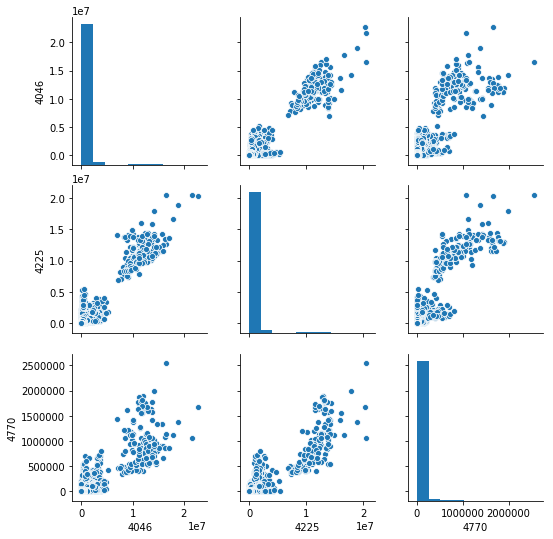

In [99]:
sns.pairplot(df, vars=['4046', '4225', '4770'], kind='scatter')

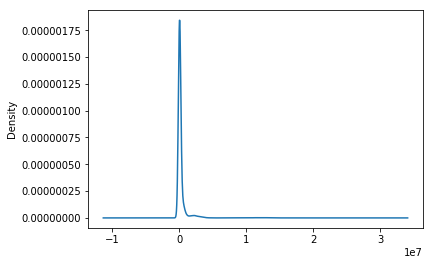

In [100]:
df['4046'].plot.kde()

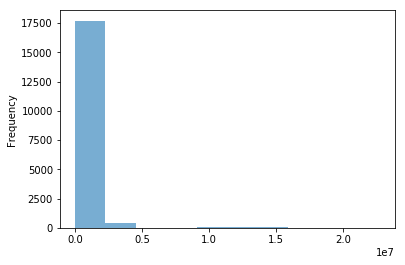

In [101]:
df['4046'].plot.hist(alpha=0.6)

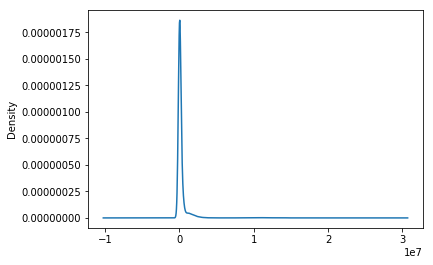

In [102]:
df['4225'].plot.kde()

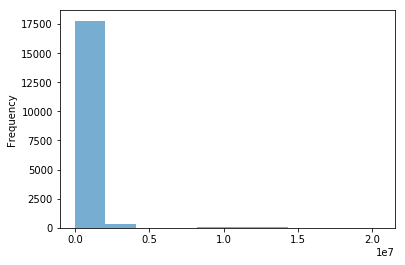

In [103]:
df['4225'].plot.hist(alpha=0.6)

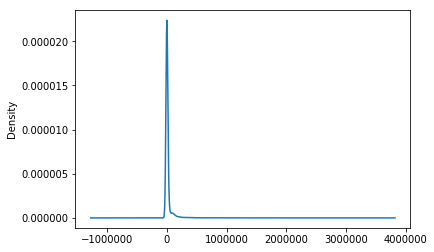

In [104]:
df['4770'].plot.kde()

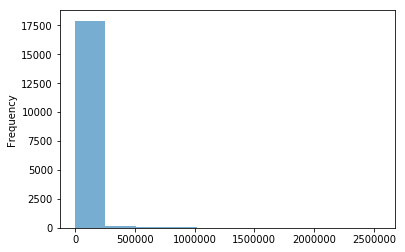

In [105]:
df['4770'].plot.hist(alpha=0.6)

9. Посчитать матрицу ковариаций. Как из нее получить собственные вектора и собственные числа?

In [106]:
corr_matrix = df.corr()
corr_matrix

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


In [107]:
C_4046_4225 = np.corrcoef(df['4046'],df['4225'])
print(C_4046_4225)

[[1.         0.92610996]
 [0.92610996 1.        ]]


In [108]:
import numpy.linalg as la
w,v = la.eig(C_4046_4225)
for i in range(len(w)):
    print(w[i], v[:,i])

1.9261099558992303 [0.70710678 0.70710678]
0.07389004410076971 [-0.70710678  0.70710678]


In [109]:
C_4046_4770 = np.corrcoef(df['4046'],df['4770'])
print(C_4046_4770)

[[1.        0.8333891]
 [0.8333891 1.       ]]


In [110]:
import numpy.linalg as la
w,v = la.eig(C_4046_4770)
for i in range(len(w)):
    print(w[i], v[:,i])

1.8333891041719166 [0.70710678 0.70710678]
0.16661089582808308 [-0.70710678  0.70710678]


In [111]:
C_4225_4770 = np.corrcoef(df['4225'],df['4770'])
print(C_4225_4770)

[[1.       0.887855]
 [0.887855 1.      ]]


In [112]:
import numpy.linalg as la
w,v = la.eig(C_4225_4770)
for i in range(len(w)):
    print(w[i], v[:,i])

1.8878549976059535 [0.70710678 0.70710678]
0.11214500239404646 [-0.70710678  0.70710678]


10. Линейное преобразование значений (проекция на ось)

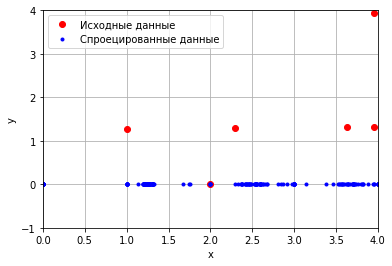

In [113]:
X_4046_4225 = df.filter(items = ['4046', '4225'])
P = np.array([[1,0],[0,0]]) # проекция на ось x
Xp_4046_4225 = np.dot(X_4046_4225,P)

plt.plot(X_4046_4225['4046'], X_4046_4225['4225'], 'ro', label="Исходные данные")
plt.plot(Xp_4046_4225[:,0], Xp_4046_4225[:,1], 'b.', label="Спроецированные данные")
plt.axis([0,4,-1,4])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

11. На какую прямую проецируем?

In [114]:
# проекция на ось x

12. Теория вероятности
13. Напишите код для моделирования 100 подбрасываний игрального кубика. Начертите диаграму histogram.

In [115]:
import random
variances = []
for i in range(100):
    dice = random.choice(['1', '2', '3', '4', '5', '6'])
    variances.append(dice)
print(variances)

['3', '5', '1', '4', '3', '1', '3', '1', '5', '3', '5', '5', '6', '6', '3', '6', '6', '5', '6', '5', '5', '1', '5', '3', '4', '5', '6', '2', '5', '4', '5', '2', '2', '3', '2', '6', '2', '6', '4', '3', '4', '5', '6', '6', '4', '2', '4', '6', '3', '2', '4', '4', '3', '1', '5', '1', '3', '2', '1', '6', '1', '5', '1', '1', '2', '5', '5', '2', '6', '5', '2', '6', '3', '1', '6', '5', '5', '5', '1', '1', '1', '5', '1', '5', '4', '3', '2', '4', '1', '3', '6', '4', '5', '3', '6', '5', '3', '2', '3', '1']


In [116]:
df_dice = pd.DataFrame.from_records(variances)
df_dice.columns = ['dice']
df_dice['dice'] = df_dice.dice.astype('int64')
df_dice.head()

,dice
0,3
1,5
2,1
3,4
4,3


In [117]:
df_dice['dice'].value_counts()

5    24
6    17
3    17
1    17
2    13
4    12
Name: dice, dtype: int64

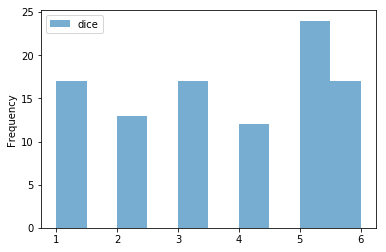

In [118]:
df_dice.plot.hist(alpha=0.6)